In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

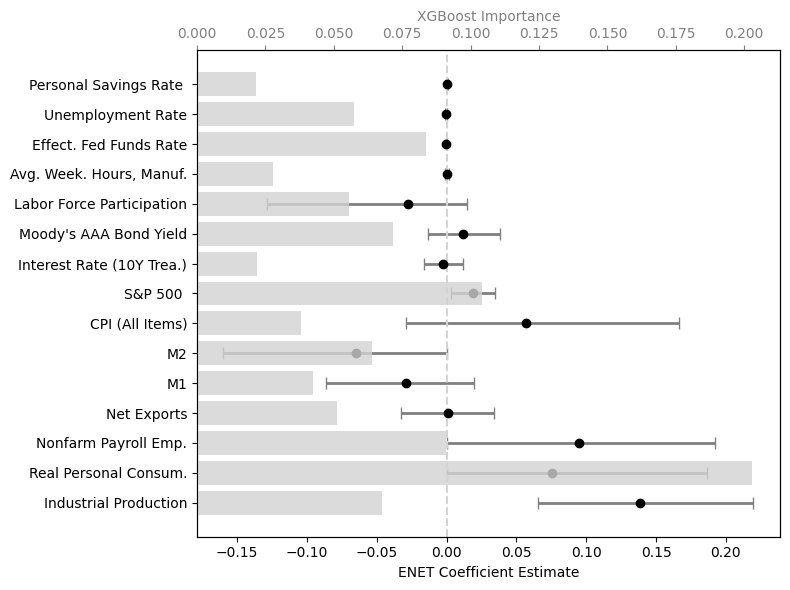

In [2]:
# Load data
df = pd.read_csv('4_variable_analysis_US.csv')

# Drop rows with NaN in 'Lower_CI_95' or 'Upper_CI_95'
df_filtered = df.dropna(subset=['Lower_CI_95', 'Upper_CI_95'])

# Plot settings
fig, ax1 = plt.subplots(figsize=(8, 6))

# ENET Regression Coefficients with 95% CI
ax1.errorbar(df_filtered['Coefficient'], df_filtered['Variables'],
             xerr=[df_filtered['Coefficient'] - df_filtered['Lower_CI_95'],
                   df_filtered['Upper_CI_95'] - df_filtered['Coefficient']],
             fmt='o', color='black', ecolor='gray', elinewidth=2, capsize=4, label='Regression Coef (95% CI)')
ax1.axvline(0, color='lightgray', linestyle='--')
ax1.set_xlabel('ENET Coefficient Estimate', color='black')
ax1.tick_params(axis='x', colors='black')
ax1.tick_params(axis='y', colors='black')

# XGBoost 
ax2 = ax1.twiny()
ax2.barh(df['Variables'], df['importance'], color='lightgray', alpha=0.8, label='XGBoost Importance')
ax2.set_xlabel('XGBoost Importance', color='gray')
ax2.tick_params(axis='x', colors='gray')

fig.tight_layout()
plt.savefig("US_variables.pdf", bbox_inches='tight', dpi = 500)
plt.show()
